#                                  Chapter 8:        
# DATA WRANGLING: JOIN, COMBINE AND RESHAPE

In [1]:
import numpy as np
import pandas as pd #Most common alias

# 8.1 Hierarchical Indexing
### a) Introduction :
`Hierarchical indexing is an important feature of pandas that enables you to have multiple
(two or more) index levels on an axis. Indices are passed in the form of nested lists from higher to level lower level. There should be same number of indices as the number of elements.`

In [2]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1   -1.882027
   2   -0.498848
   3   -0.780624
b  1    2.310130
   3    1.091722
c  1    2.601794
   2   -0.119350
d  2   -0.607394
   3   -1.186803
dtype: float64

###### The “gaps” in the index display mean `“use the label directly above”` 

level-0 : [a,b,c,d] has labels [0,1,2,3] and 

level-1 : [1,2,3] has labels [0,1,2]  

###### If we see the series in above cell : 

1) As `a` has 3 values therefore the codes will be `[0,0,0]` because the label of `a` is `0`.
-  In `a` there is a level-2 i.e `[1,2,3]` which has 3 values therefore the codes will be `[0,1,2]` .

2) Now as `b` has 2 values therefore the codes will be `[1,1]` because the label of `b` is `1` .
-  In `b` there is a level-2 i.e `[1,3]` which has 2 values therefore the codes will be `[0,2]` .

3) Now as `c` has 2 values therefore the codes will be `[2,2]` because the label of `c` is `2` .
-  In `c` there is a level-2 i.e `[1,2]` which has 2 values therefore the codes will be `[0,1]` .

4) Now as `d` has 2 values therefore the codes will be `[3,3]` because the label of `d` is `3` .
-  In `d` there is a level-2 i.e `[2,3]` which has 2 values therefore the codes will be `[1,2]` .


In [6]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

With a hierarchically indexed object, so-called partial indexing is possible, enabling you to concisely select subsets of the data:


In [20]:
data['b'][3]

1.0917223658915094

In [21]:
data['b']

1    2.310130
3    1.091722
dtype: float64

In [13]:
data['b':'d']

b  1    2.310130
   3    1.091722
c  1    2.601794
   2   -0.119350
d  2   -0.607394
   3   -1.186803
dtype: float64

In [14]:
data[['b','d']]

b  1    2.310130
   3    1.091722
d  2   -0.607394
   3   -1.186803
dtype: float64

###### Selection is even possible from an “inner” level:

In [22]:
# all indexes from level-1 and only label 2 from level-2
# 'b' has excluded from output because it doesnt have 2

data.loc[:, 2]  

a   -0.498848
c   -0.119350
d   -0.607394
dtype: float64

In [16]:
data

a  1   -1.882027
   2   -0.498848
   3   -0.780624
b  1    2.310130
   3    1.091722
c  1    2.601794
   2   -0.119350
d  2   -0.607394
   3   -1.186803
dtype: float64

###### Hierarchical indexing plays an important role in reshaping data and group-based operations like forming a pivot table. 
For example, `you could rearrange the data into a DataFrame using its unstack method` :

In [24]:
data

a  1   -1.882027
   2   -0.498848
   3   -0.780624
b  1    2.310130
   3    1.091722
c  1    2.601794
   2   -0.119350
d  2   -0.607394
   3   -1.186803
dtype: float64

In [26]:
df = data.unstack()
df  

,1,2,3
a,-1.882027,-0.498848,-0.780624
b,2.310130,NaN,1.091722
c,2.601794,-0.119350,NaN
d,NaN,-0.607394,-1.186803


###### The `inverse operation` of unstack is `stack`:

In [29]:
df.stack()

a  1   -1.882027
   2   -0.498848
   3   -0.780624
b  1    2.310130
   3    1.091722
c  1    2.601794
   2   -0.119350
d  2   -0.607394
   3   -1.186803
dtype: float64

###### With a DataFrame, either axis can have a hierarchical index:

In [2]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

In [3]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [5]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

###### With partial column indexing you can similarly select groups of columns:

In [34]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [50]:
frame['Ohio']['Green']

key1  key2
a     1       0
      2       3
b     1       6
      2       9
Name: Green, dtype: int32

### b) Reordering and Sorting Levels :

`The swaplevel takes two level numbers or names and returns a new object with the levels interchanged (but the data is otherwise unaltered)`:

In [51]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [55]:
frame.swaplevel('key2','key1')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

###### `sort_index, on the other hand, sorts the data using only the values in a single level`.
###### When swapping levels, it’s not uncommon to also use sort_index so that the result is lexicographically sorted by the indicated level:


In [57]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [71]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [74]:
frame.swaplevel('key2', 'key1')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [75]:
frame.swaplevel('key2', 'key1').sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [12]:
frame.swaplevel(0,1).sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [10]:
frame.swaplevel(1,0).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### c) Summary Statistics by Level :


Consider the above DataFrame; we can aggregate by level on either the rows or
columns like so:

In [7]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [9]:
# For label 1 -> 0+6 , 1+7 , 2+ 8 ; For Label 2 -> 3+9 , 4+10 , 5+11

frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [11]:
# For label Green -> 0+2 , 3+5 , 6+8 , 9+11 , Colorado doesn't have Red therefore it will be same .

frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### d) Indexing with a DataFrame’s columns :

In [12]:
frame = pd.DataFrame({'a': range(7), 
                      'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two','two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


###### DataFrame’s `set_index` function will create a new DataFrame using one or more of its columns as the index:

In [13]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

###### By default the columns are removed from the DataFrame, though you can leave them in:


In [14]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

###### `reset_index`, on the other hand, does the opposite of `set_index`; the hierarchical index levels are moved into the columns:

In [16]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


# 8.2 Combining and Merging Datasets

### POINTS TO REMEMBER :

###### Data contained in pandas objects can be combined together in a number of ways:
- `pandas.merge` connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.


- `pandas.concat` concatenates or “stacks” together objects along an axis.


- The `combine_first` instance method enables splicing together overlapping data to fill in missing values in one object with values from another.


### a) Database-Style DataFrame Joins :

`Merge` or `join` operations combine datasets by linking rows using one or more keys.


In [46]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})

In [18]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [19]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


This is an example of a `many-to-one join`; the data in `df1` has multiple rows labeled `a` and `b`, whereas `df2` has only one row for each value in the key column. `Calling merge with these objects we obtain` :

In [22]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


###### Note that I didn’t specify which column to join on. If that information is not specified, 
###### `merge uses the overlapping column names (i.e the columns which has same names) as the keys`.

In [39]:
df_1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data': range(7)})

df_2 = pd.DataFrame({'key1': ['a', 'b', 'd'],'data': range(3)})
df_1

,key,data
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [41]:
df_2

,key1,data
0,a,0
1,b,1
2,d,2


In [42]:
pd.merge(df_1, df_2)

,key,data,key1
0,b,0,a
1,b,1,b
2,a,2,d


It’s a good practice to specify explicitly, though:


In [43]:
pd.merge(df_1, df_2, on='data')

,key,data,key1
0,b,0,a
1,b,1,b
2,a,2,d


###### If the column names are different in each object, you can specify them separately:

In [34]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],'data2': range(3)})

In [36]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [37]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [38]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


You may notice that the `'c' and 'd'` values and `associated data are missing` from the result.

###### POINTS TO REMEMBER :
- By default merge does an 'inner' join; 
- the keys in the result are the intersection, or the common set found in both tables. 
- Other possible options are 'left','right', and 'outer'. 
- The outer join takes the union (but not in sorted order) of the keys, combining the effect of applying both left and right joins .

In [50]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [51]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [52]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [53]:
pd.merge(df1, df2, how='left')

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


In [54]:
pd.merge(df1, df2, how='right')

,key,data1,data2
0,b,0.0,1
1,b,1.0,1
2,b,6.0,1
3,a,2.0,0
4,a,4.0,0
5,a,5.0,0
6,d,NaN,2


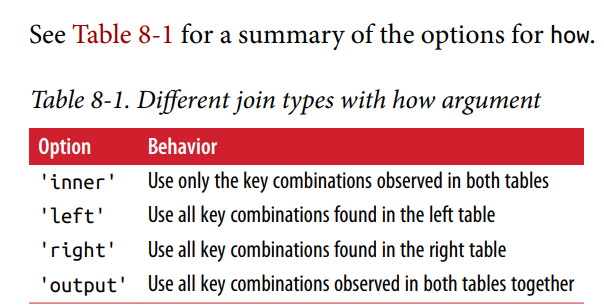


###### Many-to-many merges have well-defined, though not necessarily intuitive, behavior. Here’s an example:


In [2]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'] , 'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'] , 'data2': range(5)})

In [57]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [58]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [60]:
# result will be the cartessian product of each key

pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


###### `Many-to-many` joins form the `Cartesian product` of the rows. Since there were three `'b'` rows in the left 
###### DataFrame and two in the right one, there are `six 'b'` rows in the result.

In [61]:
 pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


###### To merge with multiple keys, pass a list of column names:

In [6]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 'key2': ['one', 'two', 'one'], 'lval': [1, 2, 3]})
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [7]:
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],'key2': ['one', 'one', 'one', 'two'],
                        'rval': [4, 5, 6, 7]})
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [12]:
# took the cartessian product on [key1,key2] = [foo,one] because these values can be seen in boh dfs.
# [foo,two] will be write once because its in second df only.

pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


`To determine which key combinations will appear in the result depending on the choice of merge method, think of the multiple keys as forming an array of tuples to be used as a single join key` .

###### A last issue to consider in merge operations is the treatment of overlapping column names. While you can address the overlap manually (see the earlier section on renaming axis labels), merge has a suffixes option for specifying strings to append to overlapping names in the left and right DataFrame objects:

In [13]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [14]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [15]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [17]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


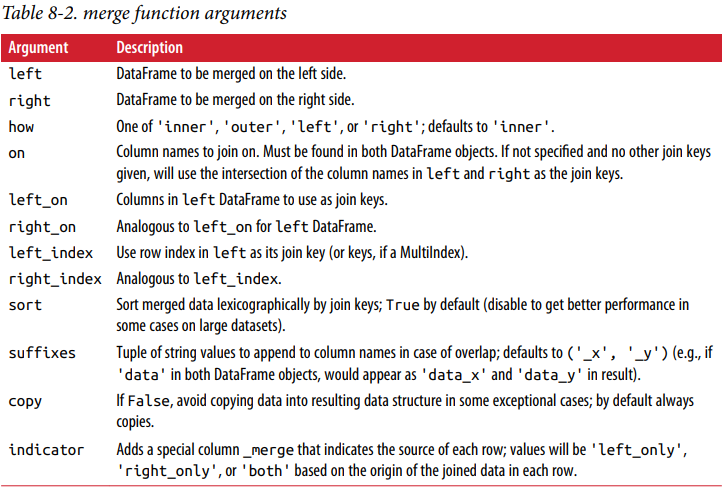

### b) Merging on Index :

`In some cases, the merge key(s) in a DataFrame will be found in its index. In this case, you can pass left_index=True or right_index=True (or both) to indicate that the index should be used as the merge key` :

In [16]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],'value': range(6)})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [19]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
right1

,group_val
a,3.5
b,7.0


In [24]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


###### POINTO REMEMBER :
`Since the default merge method is to intersect the join keys, you can instead form the union of them with an outer join`

In [25]:
 pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


###### With hierarchically indexed data, things are more complicated, as joining on index is implicitly a multiple-key merge:


In [26]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio','Nevada', 'Nevada'],
                       'key2': [2000, 2001, 2002, 2001, 2002],
                       'data': np.arange(5.)})
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [27]:
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                        index=[['Nevada', 'Nevada', 'Ohio', 'Ohio','Ohio', 'Ohio'],
                               [2001, 2000, 2000, 2000, 2001, 2002]],
                        columns=['event1', 'event2'])
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

###### In this case, you have to indicate multiple columns to merge on as a list (note the handling of duplicate index 

###### values with `how='outer'`):


In [28]:
 pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [29]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


###### Using the indexes of both sides of the merge is also possible:

In [2]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [5]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],index=['b', 'e', 'd', 'c'],
                        columns=['Missouri', 'Alabama'])
right2

,Missouri,Alabama
b,7.0,8.0
e,9.0,10.0
d,11.0,12.0
c,13.0,14.0


In [8]:
# outer = union of indexes
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,13.0,14.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,9.0,10.0


In [7]:
# inner = intersection of indexes 
pd.merge(left2, right2, how='inner', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
c,3.0,4.0,13.0,14.0
e,5.0,6.0,9.0,10.0


###### POINT TO REMEMBER :

###### DataFrame has a convenient `join` instance for `merging by index`. `It can also be used to combine` 

###### `together many DataFrame objects having the same or similar indexes but non-overlapping `

###### `columns`. `By default, join performs the left join`
In the prior example, we could have written :

In [9]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,13.0,14.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,9.0,10.0


In [20]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [22]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [21]:
right1

,group_val
a,3.5
b,7.0


In [26]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [27]:
right2

,Missouri,Alabama
b,7.0,8.0
e,9.0,10.0
d,11.0,12.0
c,13.0,14.0


In [17]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],index=['a', 'c', 'e', 'f'],
                        columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [24]:
# Has joined 3 dataframes with left join . 

left2.join([right2,another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,13.0,14.0,9.0,10.0
e,5.0,6.0,9.0,10.0,11.0,12.0


In [28]:
# outer will join all the 3 dataframes with union of their indexes
left2.join([right2, another], how='outer')

F:\Anaconda\lib\site-packages\pandas\core\frame.py:6848: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,13.0,14.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,9.0,10.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### c) Concatenating Along an Axis :

`Another kind of data combination operation is referred to interchangeably as concatenation, binding, or stacking`. NumPy’s concatenate function can do this with NumPy arrays:

In [29]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
np.concatenate([arr, arr], axis=1) # on column (horizontally)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

###### POINTS TO REMEMBER :
In the context of pandas objects such as Series and DataFrame, you have a number of additional things to think about:

- `If the objects are indexed differently on the other axes, should we combine the distinct elements in these axes or use only the shared values (the intersection)?`

- `Do the concatenated chunks of data need to be identifiable in the resulting object?`

- `Does the “concatenation axis” contain data that needs to be preserved? In many cases, the default integer labels in a DataFrame are best discarded during concatenation`.

###### The `concat` function in pandas provides a consistent way to address each of these concerns. 
I’ll give a number of examples to illustrate how it works. 
###### Suppose we have three Series with no index overlap:



In [35]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['e', 'd', 'c'])
s3 = pd.Series([5, 6], index=['f', 'g'])
s1

a    0
b    1
dtype: int64

In [36]:
s2

e    2
d    3
c    4
dtype: int64

In [37]:
s3

f    5
g    6
dtype: int64

###### Calling `concat` with these objects in a list glues together the values and indexes:

In [40]:
#return unsorted series when working on rows 
pd.concat([s1, s2, s3])

a    0
b    1
e    2
d    3
c    4
f    5
g    6
dtype: int64

###### POINT TO REMEMBER :
`By default concat works along axis=0, producing another Series. If you pass axis=1, the result will instead be a DataFrame (axis=1 is the columns)`:

In [42]:
#return sorted index DataFrame when working on columns .

pd.concat([s1, s2, s3], axis=1)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,4.0,NaN
d,NaN,3.0,NaN
e,NaN,2.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


###### In this case there is no overlap on the other axis, which as you can see is the 
###### `sorted union (the 'outer' join)` of the indexes. You can instead intersect them by passing 
###### `join='inner'`:

In [43]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [44]:
pd.concat([s1, s4], axis=1)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [46]:
#  the 'f' and 'g' labels disappeared because of the join='inner' option

pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


###### You can even specify the axes to be used on the other axes with `join_axes` :

In [50]:
# return NaN on index `c` and `e` because both indexes are not in the s1,s4 series.

pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


A potential issue is that the concatenated pieces are not identifiable in the result. `Suppose instead you wanted to create a hierarchical index on the concatenation axis. To do this, use the keys argument`:


In [54]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [62]:
 result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


###### In the case of combining Series along axis=1, the keys become the DataFrame column headers:

In [63]:
 pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,4.0,NaN
d,NaN,3.0,NaN
e,NaN,2.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


###### The same logic extends to DataFrame objects:

In [64]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],columns=['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [66]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],columns=['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [68]:
pd.concat([df1, df2], axis=1)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,two,three,four
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


In [69]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

###### If you pass a dict of objects instead of a list, the dict’s keys will be used for the keys option:

In [70]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

###### We can name the created axis levels with the names argument:

In [71]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],names=['upper', 'lower'])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

###### A last consideration concerns DataFrames in which the row index does not contain any relevant data:

In [72]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df1

,a,b,c,d
0,0.140254,0.561764,0.780985,-1.882722
1,0.659057,0.619911,-0.334251,0.339835
2,-1.279300,-0.414284,0.623601,1.659994


In [73]:
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df2

,b,d,a
0,-0.450314,0.704398,-0.607944
1,-1.172129,-1.232596,-0.612065


###### In this case, you can pass `ignore_index=True`  :

In [76]:
pd.concat([df1, df2] , ignore_index=True)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,0.140254,0.561764,0.780985,-1.882722
1,0.659057,0.619911,-0.334251,0.339835
2,-1.279300,-0.414284,0.623601,1.659994
3,-0.607944,-0.450314,NaN,0.704398
4,-0.612065,-1.172129,NaN,-1.232596


In [77]:
pd.concat([df1, df2])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,0.140254,0.561764,0.780985,-1.882722
1,0.659057,0.619911,-0.334251,0.339835
2,-1.279300,-0.414284,0.623601,1.659994
0,-0.607944,-0.450314,NaN,0.704398
1,-0.612065,-1.172129,NaN,-1.232596


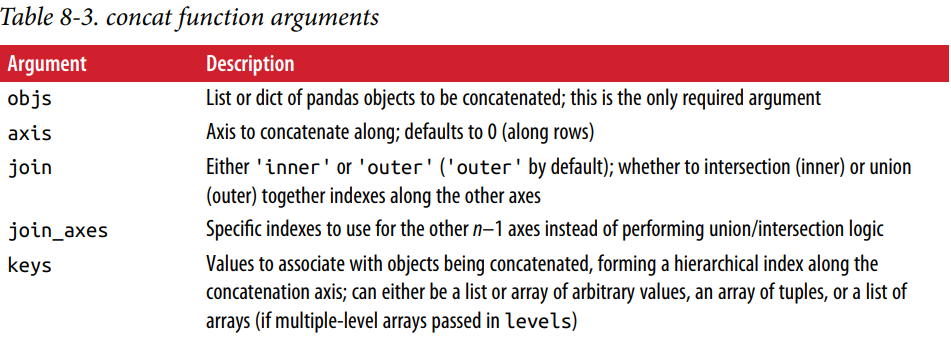

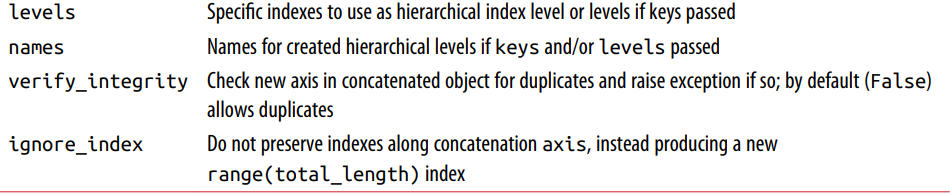

### d) Combining Data with Overlap :


Consider NumPy’s `where` function, which performs the array-oriented equivalent of an if-else expression:

In [3]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index=['f', 'e', 'd', 'c', 'b', 'a'])
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [4]:
b = pd.Series(np.arange(len(a), dtype=np.float64),index=['f', 'e', 'd', 'c', 'b', 'a'])
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [6]:
b[-1] = np.nan
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [8]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

###### Series has a `combine_first` method, which performs the equivalent of this operation along with pandas’s usual data alignment logic:

In [18]:
# It will keep b's value if both a and b row is filled

b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [12]:
a[2:]

d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [13]:
b[:-2]

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64

In [15]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],'b': [np.nan, 2., np.nan, 6.],'c': range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [16]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.], 'b': [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [19]:
# will keep df1 value if both dataframe's particular column is filled
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# 8.3 Reshaping and Pivoting

There are a number of basic operations for rearranging tabular data. These are alternatingly referred to as reshape or pivot operations.

### a) Reshaping with Hierarchical Indexing :

###### Hierarchical indexing provides a consistent way to rearrange data in a DataFrame.

###### There are two primary actions:
1) `stack`
- This “rotates” or pivots from the columns in the data to the rows

2) `unstack`
- This pivots from the rows into the columns

I’ll illustrate these operations through a series of examples. Consider a small DataFrame with string arrays as row and column indexes:

In [22]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


###### Using the `stack` method on this data pivots `the columns into the rows`, producing a Series:

In [23]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

###### From a `hierarchically indexed` Series, `you can rearrange the data back into a DataFrame` with `unstack`  .

In [24]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


###### POINT TO REMEMBER :

`By default the innermost level is unstacked (same with stack). You can unstack a different level by passing a level number or name` :

In [25]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [26]:
# OR
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


###### Unstacking might introduce missing data if all of the values in the level aren’t found in each of the subgroups:

In [36]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s1

a    0
b    1
c    2
d    3
dtype: int64

In [37]:
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
s2

c    4
d    5
e    6
dtype: int64

In [34]:
data2 = pd.concat([s1, s2])
data2

a    0
b    1
c    2
d    3
c    4
d    5
e    6
dtype: int64

In [38]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [39]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


###### Stacking filters out missing data by default, so the operation is more easily invertible:

In [40]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [41]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

###### When you unstack in a DataFrame, the level unstacked becomes the lowest level in the result:

In [42]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [44]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [45]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

###### When calling stack, we can indicate the name of the axis to stack:

In [46]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### b) Pivoting “Long” to “Wide” Format :

`A common way to store multiple time series in databases and CSV is in so-called long
or stacked format`. Let’s load some example data and do a small amount of time series
wrangling and other data cleaning:


In [53]:
data = pd.read_excel('pandas chapter 8 data.xlsx')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


######  `PeriodIndex` combines the year and quarter columns to create a kind of time interval type.

In [57]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,name='date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1'], dtype='period[Q-DEC]', name='date', freq='Q-DEC')

In [59]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
columns

Index(['realgdp', 'infl', 'unemp'], dtype='object', name='item')

In [60]:
data = data.reindex(columns=columns)
data

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2


In [61]:
data.index = periods.to_timestamp('D', 'end')
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2


In [64]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [63]:
ldata[:10]


,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


###### This is the so-called long format for multiple time series, or other observational data with two or more keys (here, our keys are date and item). Each row in the table represents a single observation.

### c) Pivoting “Wide” to “Long” Format :

###### `An inverse operation to pivot for DataFrames is pandas.melt`. 

###### Rather than transforming one column into many in a new DataFrame, 

###### `it merges multiple columns into one`,` producing a DataFrame that is longer than the input.` 
Let’s look at an example:

In [65]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],'B': [4, 5, 6],'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


###### The 'key' column may be a group indicator, and the other columns are data values. When using `pandas.melt` , we must indicate which columns (if any) are group indicators. Let’s use `'key'` as the only group indicator here:

In [66]:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


###### Using `pivot` , we can reshape back to the original layout:

In [69]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


###### Since the result of pivot creates an index from the column used as the row labels, we may want to use reset_index to move the data back into a column

In [70]:
 reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


###### You can also specify a subset of columns to use as value columns:

In [71]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


###### `pandas.melt` can be used without any group identifiers, too:

In [72]:
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [73]:
pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


# 8.4 Conclusion

Chapter 8 has been completed . Now you have some pandas basics for data import, cleaning, and reorganization under your belt .